# Preparación de los conjuntos de validación y entrenamiento/test

In [1]:
import pandas as pd
import random

Cargamos el pickle con el dataset preprocesado.

In [2]:
df_INbreast = pd.read_pickle('./df_INbreast.pkl')

Escogemos una fracción del 10% para cada una de las categorías para crear el conjunto de validación.

In [3]:
random.seed(2021)
fraccion = .1
casos_total = df_INbreast[['Case ID', 'Bi-Rads']].drop_duplicates(subset = ['Case ID'])
casos_val = casos_total[casos_total['Bi-Rads'] == 'benigno'].sample(frac = fraccion)[['Case ID', 'Bi-Rads']]
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'maligno'].sample(frac = fraccion)[['Case ID', 'Bi-Rads']])
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'actuación'].sample(frac = fraccion)[['Case ID', 'Bi-Rads']])
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'control'].sample(frac = fraccion)[['Case ID', 'Bi-Rads']])

Mostramos por pantalla la cantidad de casos por cada categoría de la muestra que formará el conjunto de validación.

<AxesSubplot:>

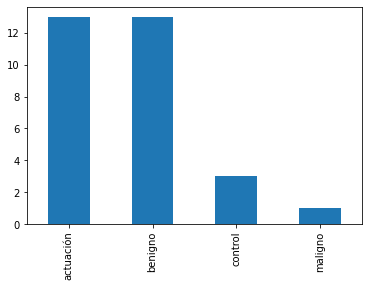

In [4]:
casos_val['Bi-Rads'].value_counts().plot(kind = 'bar')

Dividimos el dataset original en conjunto de validación y de entrenamiento/test. Hacemos también la división de los conjuntos resultantes según su vista para facilitar el entrenamiento por separado de las dos ramas.

In [5]:
df_INbreast_val = df_INbreast[df_INbreast['Case ID'].isin(casos_val['Case ID'])]
df_INbreast = df_INbreast[~df_INbreast['Case ID'].isin(casos_val['Case ID'])]

In [6]:
df_INbreast_val_cc = df_INbreast_val[df_INbreast_val['View'] == 'CC']
df_INbreast_val_mlo = df_INbreast_val[df_INbreast_val['View'] == 'MLO']
df_INbreast_cc = df_INbreast[df_INbreast['View'] == 'CC']
df_INbreast_mlo = df_INbreast[df_INbreast['View'] == 'MLO']

Almacenamos los dataset resultantes en ficheros pickle.

In [7]:
df_INbreast_val.to_pickle('./df_INbreast_val.pkl')
df_INbreast_val_cc.to_pickle('./df_INbreast_val_cc.pkl')
df_INbreast_val_mlo.to_pickle('./df_INbreast_val_mlo.pkl')
df_INbreast.to_pickle('./df_INbreast_train.pkl')
df_INbreast_cc.to_pickle('./df_INbreast_train_cc.pkl')
df_INbreast_mlo.to_pickle('./df_INbreast_train_mlo.pkl')